**Project Scenario:** You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?<br>
* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?<br>
* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?<br>
* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

The following describes the dataset variables:

·      **CRIM** - per capita crime rate by town<br>
·      **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
·      **INDUS** - proportion of non-retail business acres per town.<br>
·      **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
·      **NOX** - nitric oxides concentration (parts per 10 million)<br>
·      **RM** - average number of rooms per dwelling<br>
·      **AGE** - proportion of owner-occupied units built prior to 1940<br>
·      **DIS** - weighted distances to five Boston employment centres<br>
·      **RAD** - index of accessibility to radial highways<br>
·      **TAX** - full-value property-tax rate per USD 10,000<br>
·      **PTRATIO** - pupil-teacher ratio by town<br>
·      **LSTAT** - % lower status of the population<br>
·      **MEDV** - Median value of owner-occupied homes in $1000's

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
import datetime
%matplotlib inline

sns.set_style('darkgrid')

### Load the dataset

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url, index_col=[0])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Data Exploration

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


In [4]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Generate Descriptive Statistics and Visualizations

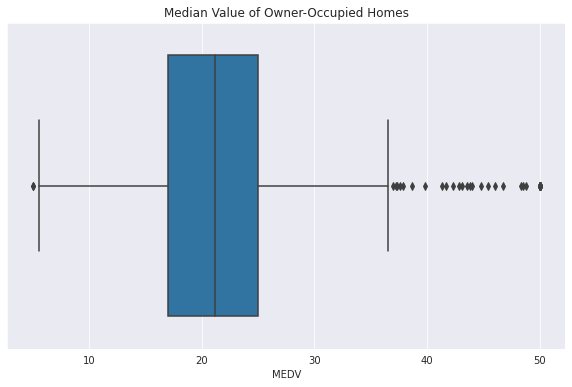

In [5]:
# A boxplot for the "Median value of owner-occupied homes" 

plt.figure(figsize=(10,6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Median Value of Owner-Occupied Homes')
plt.show;

Explanation: Note the outliers especially after the max whisker (about 37.0)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


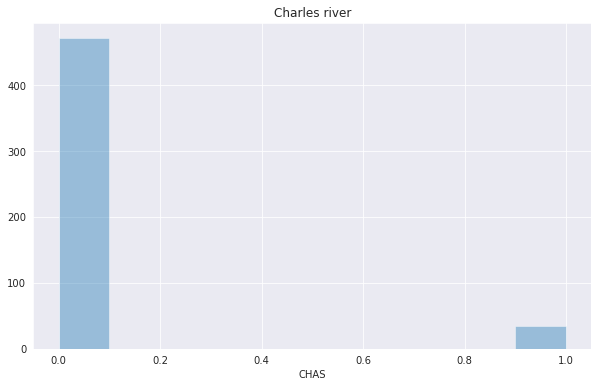

In [6]:
# A Histogram for the Charles river variable

plt.figure(figsize=(10,6))
sns.distplot(a=boston_df['CHAS'], bins=10, kde=False)
plt.title('Charles river')
plt.show;

Explanation: Most data points are in bin range 0.0-0.1 compare to 0.9-1.0, so majority of tracts don't bound Charles river

In [7]:
# A boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, 
# between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


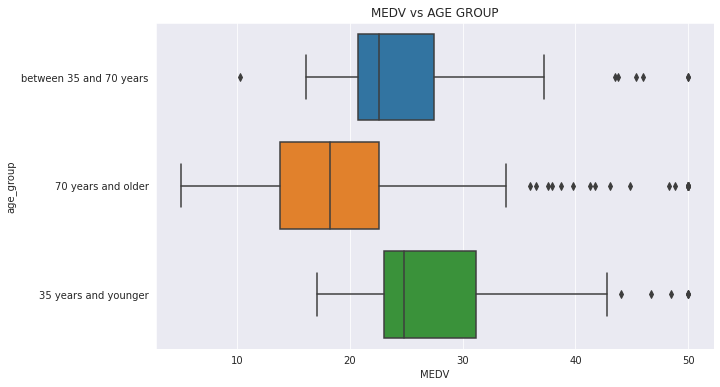

In [8]:
# A boxplot for "MEDV variable vs the AGE variable" 

plt.figure(figsize=(10,6))
sns.boxplot(x=boston_df['MEDV'], y=boston_df['age_group'])
plt.title('MEDV vs AGE GROUP')
plt.show;

Explanation: Those who are 35 years old and younger have the highest MEDV; it means they are staying in houses with the highest median value of house prices.<br>
Folks older than 70 years old have the lowest median means they generally live in houses that are cheaper compare to the younger age groups.

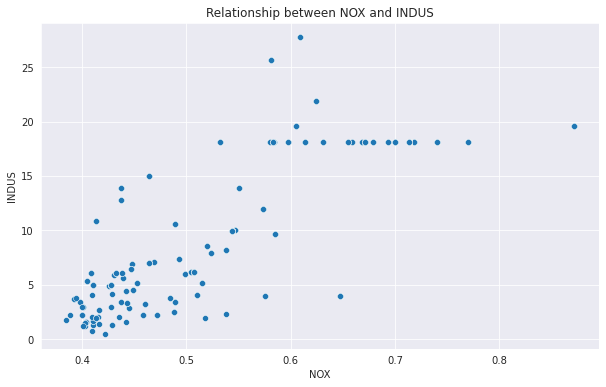

In [9]:
# A scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

plt.figure(figsize=(10,6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Relationship between NOX and INDUS')
plt.show;

Explanation: It seems there is a positive correlation between NOX and INDUS but only up to NOX at 0.6 and INDUS at 15.<br>
Fom there onwards, NOX increases in much greater proportion with a slight or flat increase in INDUS.

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


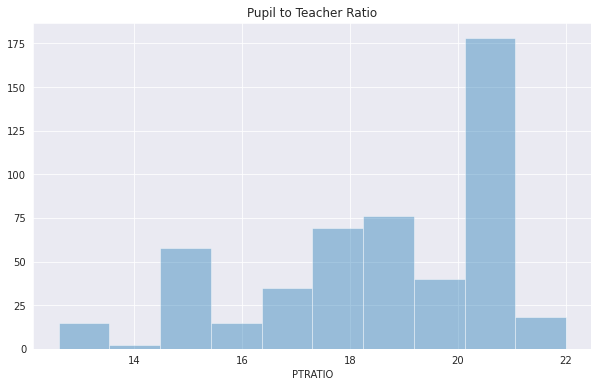

In [10]:
# A histogram for the pupil to teacher ratio variable

plt.figure(figsize=(10,6))
sns.distplot(a=boston_df['PTRATIO'], bins=10, kde=False)
plt.title('Pupil to Teacher Ratio')
plt.show;

Explanation: Pupil to Teacher ratio highest in the bin range 20-21.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Hyphotesis**<br> 

Null Hypothesis ($H_0$): µ1 = µ2  (There is no difference in median value of houses bounded by the Charles river) <br>
Alternative Hypothesis ($H_1$): µ1 ≠ µ2  (There is a difference in median value of houses bounded by the Charles river)<br>
α = 0.05

In [11]:
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

Test for equality of variance

In [12]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

As p-value < 0.05, we cannot assume variances are equal

In [13]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since p-value < 0.05, we reject null hyphotesis as there is evidence that there is a statistical difference in median value of houses bounded by Charles river.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Hyphotesis**<br>

Null Hypothesis ( 𝐻0 ): µ1 = µ2 = µ3 (All three means are equal)<br>
Alternative Hypothesis ( 𝐻1 ): At least one of the means differ<br>
α = 0.05

Test for equality of variance

In [14]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'], 
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

As p-value > 0.05, we can assume variances are equal

In [15]:
thirtyfive_and_younger = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_and_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_and_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [16]:
f_stats, p_value = scipy.stats.f_oneway(thirtyfive_and_younger, thirtyfive_and_seventy, seventy_and_older)
print('F-Statistics: {0}, P-Value: {1}'.format(f_stats, p_value))

F-Statistics: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since p-value < 0.05, we reject null hyphotesis as there is evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hyphotesis**<br>

Null Hypothesis ( 𝐻0 ): No correlation between NOX and INDUS<br>
Alternative Hypothesis ( 𝐻1 ): There is correlation between NOX and INDUS<br>
α = 0.05

In [17]:
pearson_co, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print('Pearson Coefficient: {0}, P-value: {1}'.format(pearson_co, p_value))

Pearson Coefficient: 0.7636514469209151, P-value: 7.913361061238693e-98


**Conclusion:** Since p-value < 0.05, we reject null hyphotesis as there is evidence that there is relationship between NOX and INDUS.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

 **DIS:** weighted distances to five Boston employment centres<br>
 **MEDV:** Median value of owner-occupied homes in $1000's

**Hyphotesis**<br>

Null Hypothesis ( 𝐻0 ): No impact of additional DIS on MEDV<br>
Alternative Hypothesis ( 𝐻1 ): There is an impact of additional DIS on MEDV<br>
α = 0.05

In [18]:
# X is the input variable or independent variable
X = boston_df['DIS']

# y is the dependent variable
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           1.21e-08
Time:                        03:46:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since p-value < 0.05, we reject null hyphotesis as there is evidence that there is impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.